This notebook is intended to plot rates.

In [ ]:
import sys
sys.path.append('/lhome/ific/c/ccortesp/Analysis/libs')

import crudo
import fit_functions as ff
from   iminuit      import Minuit
from   iminuit.cost import LeastSquares
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import scipy

%matplotlib inline
%load_ext autoreload
%autoreload 2

## Runs Information

In [2]:
# List of high-energy (HE) runs
runs_info = {
                # # Condition 0:  castle = open #
                # 15062: {"duration": 84783, "OK": 69564, "LOST": 1339},
                # 15063: {"duration": 79120, "OK": 65052, "LOST": 1241},
                # 15076: {"duration": 69316, "OK": 56775, "LOST": 1080},
                # # Condition 1:  castle = pclosed & RAS = on #
                # 15288: {"duration": 87256, "OK": 30201, "LOST": 8397},
                # 15289: {"duration": 82152, "OK": 28180, "LOST": 7884},
                # 15290: {"duration": 61295, "OK": 20931, "LOST": 5915},
                # # Condition 2:  castle = pclosed & RAS = off #
                # 15299: {"duration": 60204, "OK": 18014, "LOST": 8929},
                # 15318: {"duration": 86706, "OK": 28735, "LOST": 1011},
                # 15319: {"duration": 85823, "OK": 27973, "LOST": 1008},
                # 15330: {"duration": 86462, "OK": 28157, "LOST": 1043},
                # 15331: {"duration": 85389, "OK": 27390, "LOST": 9966},
                # 15332: {"duration": 67758, "OK": 22010, "LOST": 8142},      # Loosely estimated
                # 15462: {"duration": 39365, "OK": 12847, "LOST": 4532},
                # 15472: {"duration": 86563, "OK": 28505, "LOST": 1001},      # Loosely estimated
                # 15478: {"duration": 86835, "OK": 28702, "LOST": 9999},
                # 15479: {"duration": 86876, "OK": 28713, "LOST": 1003},
                # 15484: {"duration": 86538, "OK": 28188, "LOST": 1046},
                # 15485: {"duration": 86186, "OK": 28281, "LOST": 1030},
                # 15486: {"duration": 86578, "OK": 28700, "LOST": 1036},
                # 15487: {"duration": 86456, "OK": 28703, "LOST": 9952},
                # 15488: {"duration": 86367, "OK": 28891, "LOST": 1004},
                # 15489: {"duration": 60554, "OK": 20059, "LOST": 7031},
                # # Condition 3:  castle = closed & RAS = on #
                # 15502: {"duration": 85477, "OK": 28287, "LOST": 9564},
                # 15504: {"duration": 85194, "OK": 28297, "LOST": 9537},
                # 15505: {"duration": 86517, "OK": 28632, "LOST": 9725},
                # 15506: {"duration": 84841, "OK": 28438, "LOST": 9603},
                # 15507: {"duration": 55740, "OK": 18569, "LOST": 6149},
                # 15514: {"duration": 59207, "OK": 20054, "LOST": 6646},
                # 15519: {"duration": 34045, "OK": 11420, "LOST": 3646},
                # 15520: {"duration": 85170, "OK": 28050, "LOST": 9130},
                # 15521: {"duration": 85388, "OK": 28396, "LOST": 8831},
                # 15527: {"duration": 69725, "OK": 23560, "LOST": 7411},
                # 15528: {"duration": 41361, "OK": 13460, "LOST": 4426},
                # 15535: {"duration": 84904, "OK": 28799, "LOST": 9156},
                # 15539: {"duration": 56567, "OK": 15618, "LOST": 9586},       
                # 15540: {"duration": 67663, "OK": 22526, "LOST": 7066},      
                # 15541: {"duration": 86630, "OK": 29124, "LOST": 9333},
                # 15542: {"duration": 87915, "OK": 29717, "LOST": 9274},
                # 15543: {"duration": 86570, "OK": 29160, "LOST": 9123},
                # 15544: {"duration": 86566, "OK": 29498, "LOST": 9029},
                # 15545: {"duration": 85892, "OK": 29437, "LOST": 8877},
                # 15546: {"duration": 84822, "OK": 28663, "LOST": 8704},
                # 15547: {"duration": 71594, "OK": 24549, "LOST": 7421},
                # 15557: {"duration": 66088, "OK": 22273, "LOST": 6929},

                # ----- P E R I O D  0 2 ----- #
                
                # Jul 2025: castle = closed & RAS = off #
                15609: {"duration": 79563, "OK": 28168, "LOST": 8392},
                15614: {"duration": 81279, "OK": 28543, "LOST": 8472},
                15615: {"duration": 86302, "OK": 30165, "LOST": 9046},
                15616: {"duration": 86146, "OK": 30386, "LOST": 8635},
                15617: {"duration": 88041, "OK": 31274, "LOST": 8983},
                15618: {"duration": 82577, "OK": 29104, "LOST": 8619},
                15619: {"duration": 77964, "OK": 27411, "LOST": 7930},
                15621: {"duration": 83287, "OK": 29261, "LOST": 8351},
                15622: {"duration": 90371, "OK": 31543, "LOST": 9167},
                15623: {"duration": 80748, "OK": 28474, "LOST": 8300},
                15624: {"duration": 64650, "OK": 22921, "LOST": 6461},
                # Aug 2025: castle = closed & RAS = on #
                15625: {"duration": 87329, "OK": 30498, "LOST": 8570},
                # 15626: {"duration": -1, "OK": -1, "LOST": -1},  # Waiting Jose Maria
                15627: {"duration": 61872, "OK": 21967, "LOST": 6238},
                15632: {"duration": 86709, "OK": 30444, "LOST": 8826},
                15633: {"duration": 86076, "OK": 30070, "LOST": 8578},
                15634: {"duration": 86545, "OK": 30372, "LOST": 8234},
                15635: {"duration": 86545, "OK": 30372, "LOST": 9016},
                15636: {"duration": 84284, "OK": 29394, "LOST": 8465},
                15637: {"duration": 76285, "OK": 26571, "LOST": 7422},
                15639: {"duration": 87347, "OK": 30861, "LOST": 8525},
                15640: {"duration": 30714, "OK": 10700, "LOST": 3170},
                15642: {"duration": 25075, "OK": 8722 , "LOST": 2437},
                15643: {"duration": 89049, "OK": 31554, "LOST": 8674},
                15644: {"duration": 85486, "OK": 30518, "LOST": 8297},
                15645: {"duration": 85729, "OK": 30510, "LOST": 8318}, 
                15647: {"duration": 86629, "OK": 30767, "LOST": 8406},
                15648: {"duration": 86466, "OK": 31033, "LOST": 8393},
                15649: {"duration": 86270, "OK": 30639, "LOST": 8153},
                15650: {"duration": 22096, "OK": 8044 , "LOST": 2227},
                15655: {"duration": 80788, "OK": 28802, "LOST": 7950},
                15656: {"duration": 85998, "OK": 30696, "LOST": 8311},
                15657: {"duration": 86237, "OK": 30399, "LOST": 8587},
                15658: {"duration": 86032, "OK": 30601, "LOST": 8224},
                15659: {"duration": 86242, "OK": 31012, "LOST": 8390},
                15660: {"duration": 85797, "OK": 31112, "LOST": 8269},
                15661: {"duration": 76792, "OK": 27556, "LOST": 7183},        
            }

In [3]:
# Directory where the selected data is stored per run
data_dir = '/lustre/ific.uv.es/prj/gl/neutrinos/users/ccortesp/NEXT-100/data/solo/'

# ----- Nested DataFrames ----- #
# The dfs are stored in different dictionaries defined by:
cities    = ['Sophronia', 'Event']      # Do no include Dorothea by now
particles = ['Alpha', 'Electron']
regions   = ['All', 'Fiducial', 'Tube', 'Anode', 'Cathode']

# Columns to analyze in each DataFrame
# dst_col  = []
reco_col = ['event', 'time', 'X', 'Y', 'DT', 'Z', 'Q', 'Ec']

### Read the Extra Information

In [6]:
# .txt file with the extra info for each run
runs_extra_file = '/lustre/ific.uv.es/prj/gl/neutrinos/users/ccortesp/NEXT-100/Backgrounds/txt/runs_extra_info.txt'

# Dictionary with the extra info for each run
Extra_info = {run_id: {'Date_CV': None, 'Date_Err': None, 'Reco_CV': None, 'Reco_Err': None, 'Fiducial_CV': None, 'Fiducial_Err': None} for run_id in runs_info.keys()}

# Load the run extra info from the .txt file
with open(runs_extra_file, 'r') as f:
    
    for line in f:
        if line.strip():                # Ignore empty lines
            parts = line.split()
            if len(parts) == 4:         # Ensure the line has exactly four values (avoid header)

                run_id, date_cv, date_err, reco_evts = parts
                run_id = int(run_id)

                # Date
                Extra_info[run_id]['Date_CV']  = float(date_cv)
                Extra_info[run_id]['Date_Err'] = float(date_err)

                # Reconstructed events
                reco_evts = int(reco_evts)
                reco_CV, reco_var = scipy.stats.binom.stats(n=runs_info[run_id]['OK'], p=reco_evts/runs_info[run_id]['OK'], moments='mv')
                Extra_info[run_id]['Reco_CV']  = reco_CV
                Extra_info[run_id]['Reco_Err'] = np.sqrt(reco_var)

                # print(f"Run {run_id}: Date CV = {date_cv}, Date Err = {date_err}, Reco CV = {reco_CV}, Reco Err = {Extra_info[run_id]['Reco_Err']}")

# ----- Important Dates ----- #
# From NEXT-100 operations
CPC_RAS = 1746791100      # Castle = partially closed & RAS = on
CPC     = 1747042200      # Castle = partially closed & RAS = off
CC_RAS  = 1749024786      # Castle = closed & RAS = on

## Trigger02 Real Rate

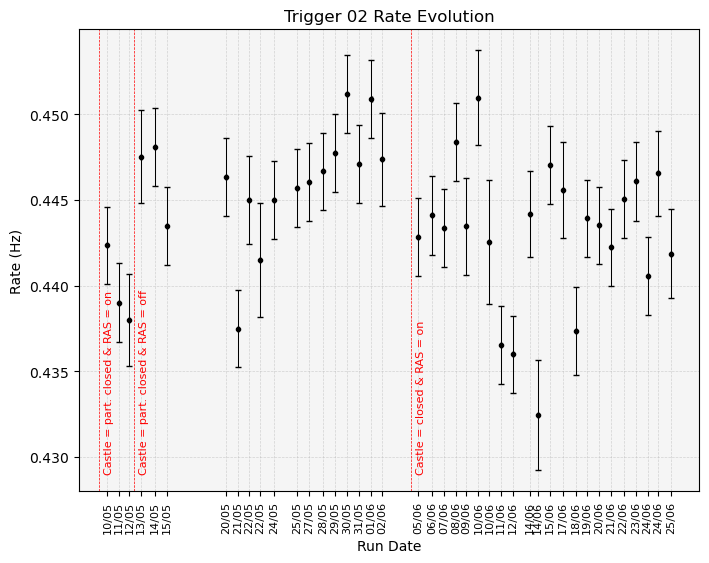

In [20]:
# ----- Radon Decay Data ----- #
Date     = []
Date_err = []
Rate     = []
Rate_err = []
Run_numbers = []

def const_func(x, a):
    return ff.linear_func(x, 0, a)

for run_id, entry in runs_info.items():

    # Skip runs with open castle if you want
    if run_id in [15062, 15063, 15076]:
        continue
    
    # Run infoormation
    run_long = entry["duration"]
    run_OK   = entry["OK"]
    run_LOST = entry["LOST"]

    Run_numbers.append(run_id)

    # Date + error for each run
    Date.append(Extra_info[run_id]['Date_CV'])
    Date_err.append(Extra_info[run_id]['Date_Err'])
    
    # Real rate + error for each run
    run_trigg = run_OK + run_LOST
    rate_CV   = run_trigg / run_long
    Rate.append(rate_CV)
    rate_stat = np.sqrt(run_trigg) / run_long;  rate_syst = 1 * (run_trigg / run_long**2)       # Stat + Syst errors (I assume 1 s as time error)
    Rate_err.append(np.sqrt(rate_stat**2 + rate_syst**2))                                       # Total error

# # ----- Linear Fits ----- #
# # Preliminary
# Date     = np.array(Date)
# Date_err = np.array(Date_err)
# Rate     = np.array(Rate)
# Rate_err = np.array(Rate_err)

# # Masking: select specific data
# CC_time = (Date >= castle_closed)       # Just fit data under condition 02

# x_data = Date[CC_time]
# y_data = Rate[CC_time]
# y_err  = Rate_err[CC_time]

# # Shifted time
# x_shift = (x_data - x_data[0]) / 3600   # In [hr] for numeric stability

# # We perform two different fits: constant and linear
# models = [const_func, ff.linear_func]

# x_fit = [[], []];  y_fit = [[], []]
# chi2  = [[], []];  ndof  = [[], []]

# for i, func in enumerate(models):

#     # Define the cost function + initial guess
#     least_squares = LeastSquares(x_shift, y_data, y_err, func)
#     init_guess    = []

#     if func == const_func:
#         init_guess = [y_data.mean()]
#     elif func == ff.linear_func:
#         init_guess = [10.0, y_data.min()]

#     print(f'\nFit 0{i+1}:\nInitial guess: {init_guess}')

#     # Define the Minuit object
#     m = Minuit(least_squares, *init_guess)

#     # Minimization process of the cost function and error estimation
#     m.migrad()
#     m.hesse()

#     # Results
#     popt = m.values;  perr = m.errors
#     print(f"Results: {popt}")

#     # Reduced chi-square
#     chi2[i] = m.fval
#     ndof[i] = len(x_shift) - m.nfit
#     print(f"χ² / ndof = {chi2[i] / ndof[i]:.4f}")

#     # Fits
#     x_fit[i] = (x_shift * 3600) + x_data[0]  # In [s]
#     y_fit[i] = func(x_shift, *popt)

# ----- Plotting ---- #
plt.figure(figsize=(8, 6))

# Data
plt.errorbar(Date, Rate, xerr=Date_err, yerr=Rate_err, fmt='o', ms=3, c='black', ecolor='black', elinewidth=0.75, capsize=2)
# for x, y, run_id in zip(Date, Rate, Run_numbers):
#     plt.text(x, y, str(run_id), fontsize=8, ha='left', va='bottom', color='blue')       # Run number near the point

# # Fits
# plt.plot(x_fit[0], y_fit[0], color='blue', ls='--', lw=1.0, label=f'Constant Fit\nχ² / ndof = {chi2[0] / ndof[0]:.2f}')
# plt.plot(x_fit[1], y_fit[1], color='orange', ls='--', lw=1.0, label=f'Linear Fit\nχ² / ndof = {chi2[1] / ndof[1]:.2f}')

# Important dates
x_date = 4e4; y_date = 0.429
plt.axvline(x=CPC_RAS, color='red', linestyle='--', lw=0.5)
plt.text(CPC_RAS+x_date, y_date, 'Castle = part. closed & RAS = on', color='red', fontsize=8, ha='left', va='bottom', rotation=90)
plt.axvline(x=CPC, color='red', linestyle='--', lw=0.5)
plt.text(CPC+x_date, y_date, 'Castle = part. closed & RAS = off', color='red', fontsize=8, ha='left', va='bottom', rotation=90)
plt.axvline(x=CC_RAS, color='red', linestyle='--', lw=0.5)
plt.text(CC_RAS+x_date, y_date, 'Castle = closed & RAS = on', color='red', fontsize=8, ha='left', va='bottom', rotation=90)

# Styling
x_labels = [crudo.epoch_converter(t, h=False) for t in Date]        # Convert x-axis bin edges to readable time format
plt.xlabel('Run Date')
plt.xticks(Date, x_labels, rotation=90, ha='center', fontsize=8)
plt.ylabel('Rate (Hz)')
# plt.ticklabel_format(axis='y', style='sci', scilimits=(-2, -2))
# plt.legend(loc='upper right', fontsize=9)
plt.title('Trigger 02 Rate Evolution')

plt.grid(True, ls='--', lw=0.5, alpha=0.5)
plt.gca().set_facecolor("whitesmoke")
plt.show()

## Reconstructed Rate

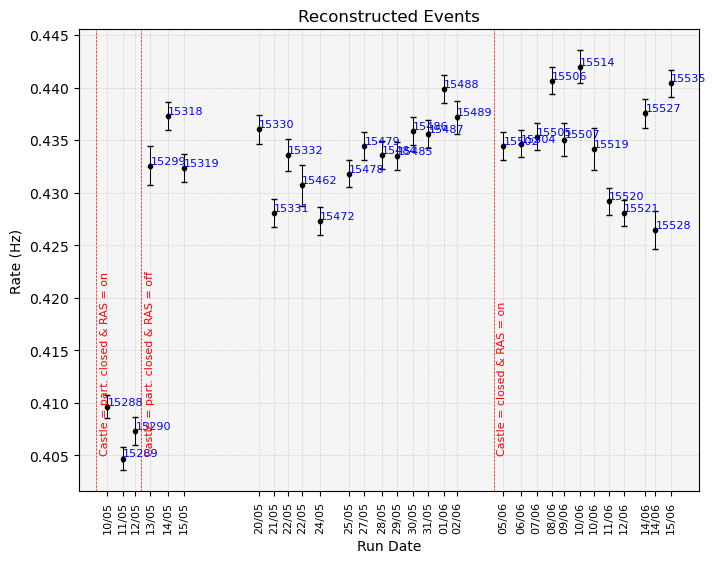

In [11]:
# ----- Radon Decay Data ----- #
Date     = []
Date_err = []
Rate     = []
Rate_err = []
Run_numbers = []

for run_id, entry in runs_info.items():

    # Skip runs with open castle if you want
    if run_id in [15062, 15063, 15076]:
        continue
    
    # Run information
    run_long = entry["duration"]
    run_OK   = entry["OK"]
    run_LOST = entry["LOST"]

    Run_numbers.append(run_id)

    # DAQe efficiency + error
    DAQe_CV, DAQe_error = ff.efficiency(run_OK, run_LOST)
    
    # Extra info
    reco_CV  = Extra_info[run_id]['Reco_CV']
    reco_Err = Extra_info[run_id]['Reco_Err']

    # Date + error for each run
    Date.append(Extra_info[run_id]['Date_CV'])
    Date_err.append(Extra_info[run_id]['Date_Err'])
    
    # Reco rate + error for each run
    rate_CV  = reco_CV / (run_long * DAQe_CV)
    rate_err = rate_CV * np.sqrt((np.sqrt(reco_Err) / reco_CV)**2 + (DAQe_error / DAQe_CV)**2)
    Rate.append(rate_CV)
    Rate_err.append(rate_err)                                  

# ----- Plotting ---- #
plt.figure(figsize=(8, 6))

# Data
plt.errorbar(Date, Rate, xerr=Date_err, yerr=Rate_err, fmt='o', ms=3, c='black', ecolor='black', elinewidth=0.75, capsize=2)
for x, y, run_id in zip(Date, Rate, Run_numbers):
    plt.text(x, y, str(run_id), fontsize=8, ha='left', va='bottom', color='blue')       # Run number near the point

# Important dates
plt.axvline(x=CPC_RAS, color='red', linestyle='--', lw=0.5)
plt.text(CPC_RAS+2e4, 0.405, 'Castle = part. closed & RAS = on', color='red', fontsize=8, ha='left', va='bottom', rotation=90)
plt.axvline(x=CPC, color='red', linestyle='--', lw=0.5)
plt.text(CPC+2e4, 0.405, 'Castle = part. closed & RAS = off', color='red', fontsize=8, ha='left', va='bottom', rotation=90)
plt.axvline(x=CC_RAS, color='red', linestyle='--', lw=0.5)
plt.text(CC_RAS+2e4, 0.405, 'Castle = closed & RAS = on', color='red', fontsize=8, ha='left', va='bottom', rotation=90)

# Styling
x_labels = [crudo.epoch_converter(t, h=False) for t in Date]        # Convert x-axis bin edges to readable time format
plt.xlabel('Run Date')
plt.xticks(Date, x_labels, rotation=90, ha='center', fontsize=8)
plt.ylabel('Rate (Hz)')
# plt.legend(loc='upper right', fontsize=9)
plt.title('Reconstructed Events')

plt.grid(True, ls='--', lw=0.5, alpha=0.5)
plt.gca().set_facecolor("whitesmoke")
plt.show()

## Fiducial Rate

In [7]:
# Key
h5_key = 'Event/Electron/Fiducial'

# ----- Run Loop ----- #
for run_id, entry in runs_info.items():

    # Run information
    run_long = entry['duration']
    run_OK   = entry['OK']
    run_LOST = entry['LOST']

    # DAQe efficiency + error
    DAQe_CV, DAQe_error = ff.efficiency(run_OK, run_LOST)

    # Load the HDF5 file
    h5_path = os.path.join(data_dir, f'run_{run_id}_sel_data.h5')

    try:
        df = pd.DataFrame()
        df = pd.read_hdf(h5_path, key=h5_key)

    except FileNotFoundError:
        print(f"Warning: File '{h5_path}' not found. Skipping this run.")
        continue
    except KeyError as e:
        print(f"Warning: Key '{e.args[0]}' not found in file '{h5_path}'. Skipping this file.")

    # Run rate
    evt = df.event.nunique()
    print(f'Run {run_id}: Events = {evt}, Duration = {run_long} s, DAQe = {DAQe_CV:.4f} ± {DAQe_error:.4f}')
    evt_CV, evt_var = scipy.stats.binom.stats(n=run_OK, p=evt/run_OK, moments='mv')
    rate_CV  = evt_CV / (run_long * DAQe_CV)
    rate_err = rate_CV * np.sqrt((np.sqrt(evt_var) / evt_CV)**2 + (DAQe_error / DAQe_CV)**2)
    print(f'Run {run_id}: Rate = {rate_CV:.4f} ± {rate_err:.4f} Hz')
    
    Extra_info[run_id]['Fiducial_CV']  = rate_CV
    Extra_info[run_id]['Fiducial_Err'] = rate_err

Run 15062: Events = 11925, Duration = 84783 s, DAQe = 0.3419 ± 0.0011
Run 15062: Rate = 0.4114 ± 0.0037 Hz
Run 15063: Events = 11075, Duration = 79120 s, DAQe = 0.3439 ± 0.0011
Run 15063: Rate = 0.4071 ± 0.0038 Hz
Run 15076: Events = 9732, Duration = 69316 s, DAQe = 0.3444 ± 0.0012
Run 15076: Rate = 0.4077 ± 0.0040 Hz
Run 15288: Events = 314, Duration = 87256 s, DAQe = 0.7824 ± 0.0021
Run 15288: Rate = 0.0046 ± 0.0003 Hz
Run 15289: Events = 275, Duration = 82152 s, DAQe = 0.7814 ± 0.0022
Run 15289: Rate = 0.0043 ± 0.0003 Hz
Run 15290: Events = 203, Duration = 61295 s, DAQe = 0.7797 ± 0.0025
Run 15290: Rate = 0.0042 ± 0.0003 Hz
Run 15299: Events = 210, Duration = 60204 s, DAQe = 0.6686 ± 0.0029
Run 15299: Rate = 0.0052 ± 0.0004 Hz
Run 15318: Events = 359, Duration = 86706 s, DAQe = 0.7396 ± 0.0022
Run 15318: Rate = 0.0056 ± 0.0003 Hz
Run 15319: Events = 320, Duration = 85823 s, DAQe = 0.7350 ± 0.0023
Run 15319: Rate = 0.0051 ± 0.0003 Hz
Run 15330: Events = 320, Duration = 86462 s, DAQe 

Results: 0.004319 ± 0.000059
χ² / ndof = 0.8432


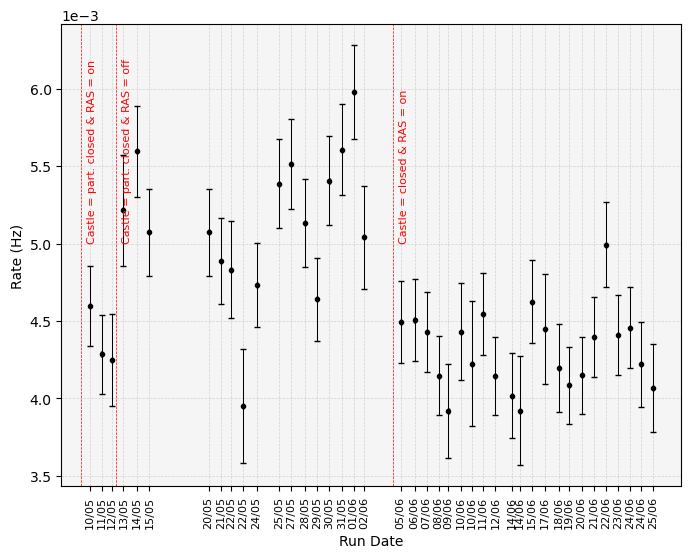

In [7]:
# ----- Radon Decay Data ----- #
Date     = []
Date_err = []
Rate     = []
Rate_err = []
Run_numbers = []

def const_func(x, a):
    return ff.linear_func(x, 0, a)

for run_id, entry in runs_info.items():

    # Skip runs with open castle if you want
    if run_id in [15062, 15063, 15076]:
        continue

    Run_numbers.append(run_id)

    # Date + error for each run
    Date.append(Extra_info[run_id]['Date_CV'])
    Date_err.append(Extra_info[run_id]['Date_Err'])
    
    # Fiducial rate + error for each run
    Rate.append(Extra_info[run_id]['Fiducial_CV'])
    Rate_err.append(Extra_info[run_id]['Fiducial_Err'])

# ----- Linear Fit ----- #
# Preliminary
Date     = np.array(Date)
Date_err = np.array(Date_err)
Rate     = np.array(Rate)
Rate_err = np.array(Rate_err)

# Masking: select specific data
CC_time = (Date >= CC_RAS)       # Just fit data under condition 03

x_data = Date[CC_time]
y_data = Rate[CC_time]
y_err  = Rate_err[CC_time]

# Shifted time
x_shift = (x_data - x_data[0]) / 3600   # In [hr] for numeric stability

# Define the cost function + initial guess
least_squares = LeastSquares(x_shift, y_data, y_err, const_func)
init_guess = [y_data.min()]

# print(f'\nFit 0{i+1}:\nInitial guess: {init_guess}')

# Define the Minuit object
m = Minuit(least_squares, *init_guess)

# Minimization process of the cost function and error estimation
m.migrad()
m.hesse()

# Results
popt = m.values;  perr = m.errors
print(f"Results: {popt[0]:.6f} ± {perr[0]:.6f}")

# Reduced chi-square
chi2 = m.fval
ndof = len(x_shift) - m.nfit
print(f"χ² / ndof = {chi2 / ndof:.4f}")

# Fits
x_fit = (x_shift * 3600) + x_data[0]  # In [s]
y_fit = const_func(x_shift, *popt)                            

# ----- Plotting ---- #
plt.figure(figsize=(8, 6))

# Data
plt.errorbar(Date, Rate, xerr=Date_err, yerr=Rate_err, fmt='o', ms=3, c='black', ecolor='black', elinewidth=0.75, capsize=2)
# for x, y, run_id in zip(Date, Rate, Run_numbers):
#     plt.text(x, y, str(run_id), fontsize=8, ha='left', va='bottom', color='blue')       # Run number near the point

# Fits
# plt.plot(x_fit, y_fit, color='blue', ls='--', lw=0.75, label=f'Fit\nχ² / ndof = {chi2 / ndof:.2f}')

# Important dates
x_date = 4e4; y_date = 0.005
plt.axvline(x=CPC_RAS, color='red', linestyle='--', lw=0.5)
plt.text(CPC_RAS+x_date, y_date, 'Castle = part. closed & RAS = on', color='red', fontsize=8, ha='left', va='bottom', rotation=90)
plt.axvline(x=CPC, color='red', linestyle='--', lw=0.5)
plt.text(CPC+x_date, y_date, 'Castle = part. closed & RAS = off', color='red', fontsize=8, ha='left', va='bottom', rotation=90)
plt.axvline(x=CC_RAS, color='red', linestyle='--', lw=0.5)
plt.text(CC_RAS+x_date, y_date, 'Castle = closed & RAS = on', color='red', fontsize=8, ha='left', va='bottom', rotation=90)

# Styling
x_labels = [crudo.epoch_converter(t, h=False) for t in Date]        # Convert x-axis bin edges to readable time format
plt.xlabel('Run Date')
plt.xticks(Date, x_labels, rotation=90, ha='center', fontsize=8)
plt.ylabel('Rate (Hz)')
plt.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
# plt.legend(loc='upper right', fontsize=9)
# plt.title('Electrons in the Fiducial Volume')

plt.grid(True, ls='--', lw=0.5, alpha=0.5)
plt.gca().set_facecolor("whitesmoke")
plt.show()